### Supervised Machine Learning
- The learning algorithms that solve problem by using datasets to train models in such a way that every instance has its corresponding label in the dataset.
- The model is supposed to have learnt to estimate a mapping function <i> y = f(X) </i> where X consists of input variables and y is the target variable so that it could provide prediction for every instances of input variables.
- These algorithms could be used to solve either a classification problem or a regression problem.
- Both of these problems have the same goal of constructing a model that could predict the target variable, but, the target variable is continuous (takes numerical values) in the regression problem whereas the target variable is categorical in the classification problem.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%ls
%cd drive/MyDrive/Data\ Science


drive/  sample_data/
/content/drive/MyDrive/Data Science


### Using the same data but different approaches - Regression
### Boston Housing Prediction
#### Problem Definition
Problem: Boston House Price Prediction
- The goal is to predict the price of houses in Boston area.
- Since we are not exactly partitioning our dataset into a fixed number of classes, but rather using the predictors to estimate the prices of houses, the problem is a regression problem.
Relevant Dataset: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data?select=housing.csv
##### Data Description:
| Attribute | Description |
| --- | --- |
| crim | per capita crime rate by town |
| zn | proportion of residential land zoned for lots over 25,000sq.ft |
| indus | proportion of non-retai business acres per town |
| chas | Charles River dummy variable (=1 if tract bounds river; 0 otherwise) |
| nox | nitric oxides concentration (parts per 10 million) |
| rm | average number of rooms per dwelling |
| age | proportion of owner-occupied units built prior to 1940 |
| dis | weighted distances to five Boston employment centers |
| rad | index of accessibility to radial highways |
| tax | full-value property-tax rate per USD 10,000 |
| ptratio | pupil-teacher ratio by town |
| b | 1000(B-0.63)^2 where B is the proportion of blacks by town |
| lstat | percentage of lower status of the population |
| medv | median value of owner-occupied homes in USD 1000’s |

#### Import all necessary libraries

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#### Loading the data and exploratory analysis

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./Boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.dataframeName = 'housing.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 506 rows and 14 columns


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<ipython-input-6-b9e5b14554bd>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

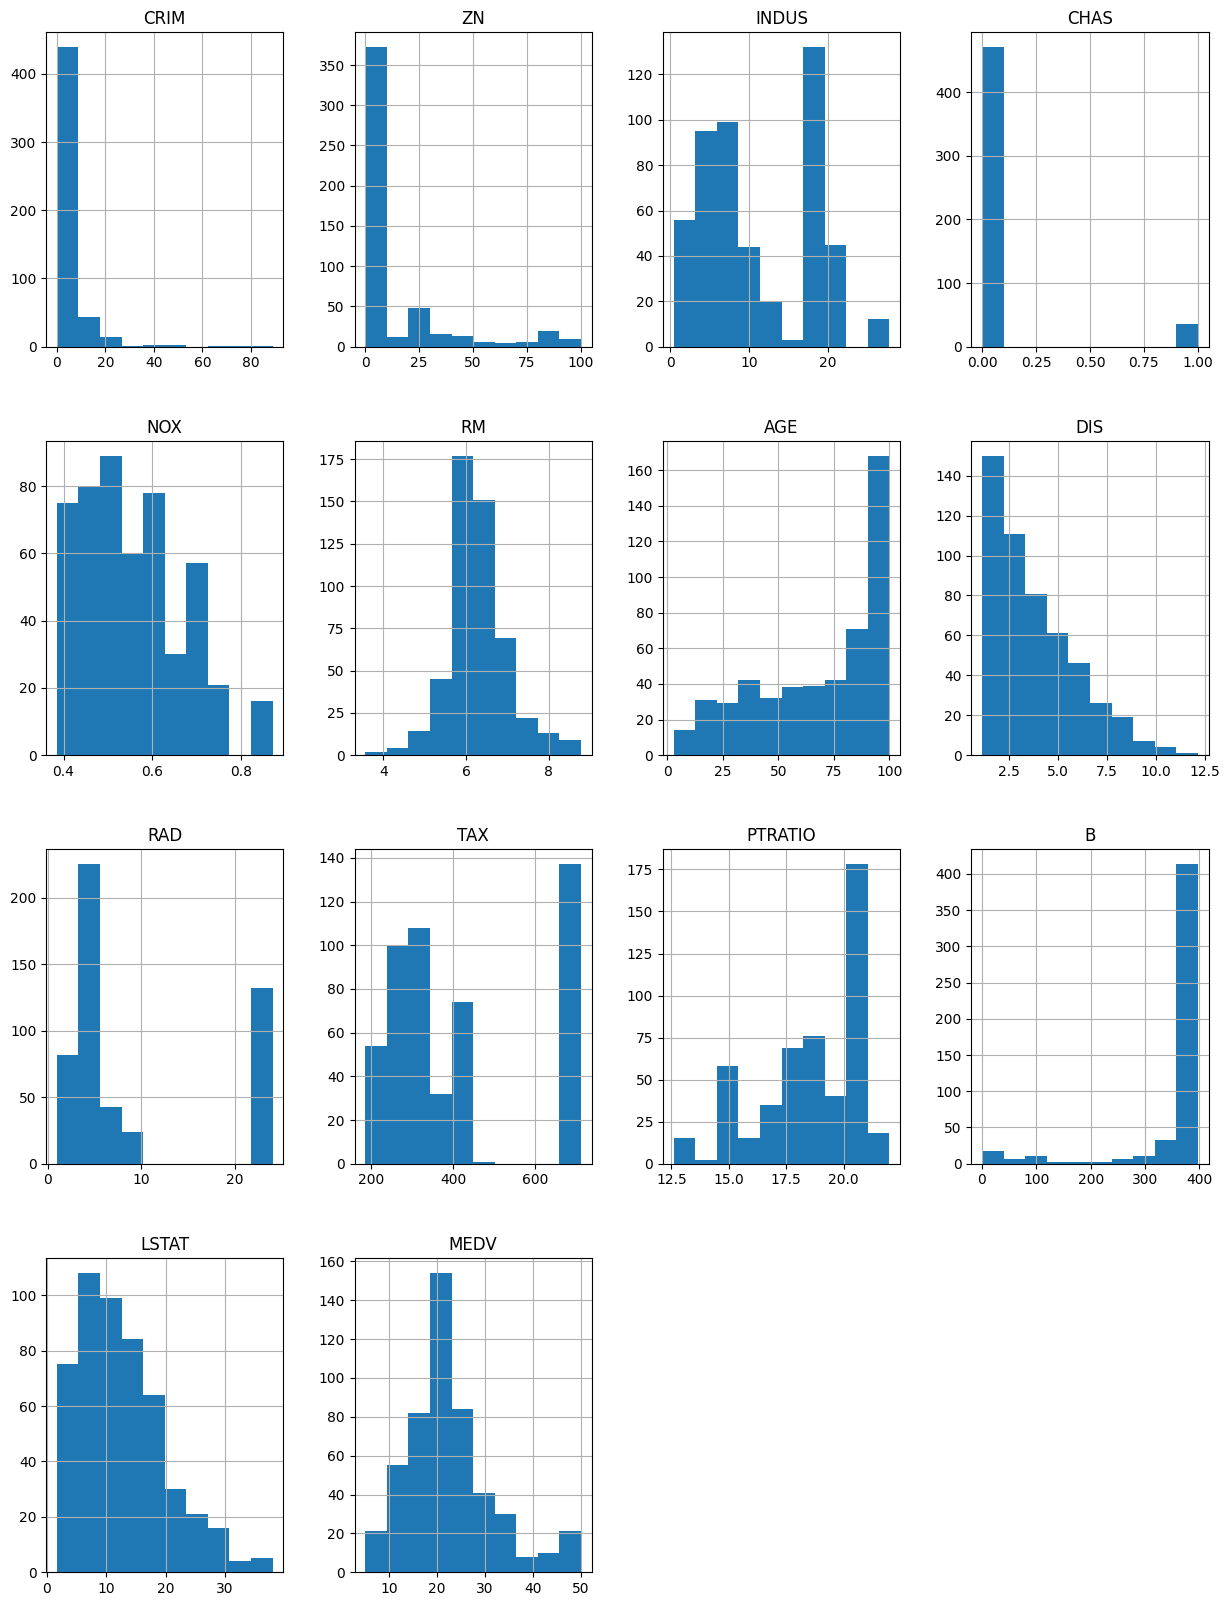

In [6]:
# how are the attributes distributed?
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
data.hist(ax=ax)

In [13]:
for k,v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  percentage_outlier = np.shape(v_col)[0] / np.shape(data)[0] * 100
  print(f"Column {k} outliers = {percentage_outlier:.2f}%")

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


<Axes: >

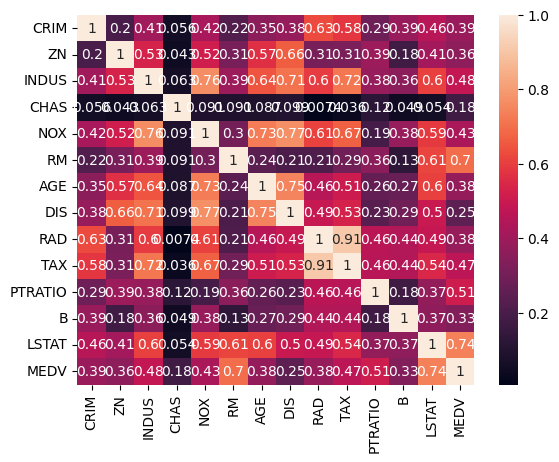

In [14]:
sns.heatmap(data.corr().abs(), annot=True)

#### Data Preparation for Training and Testing

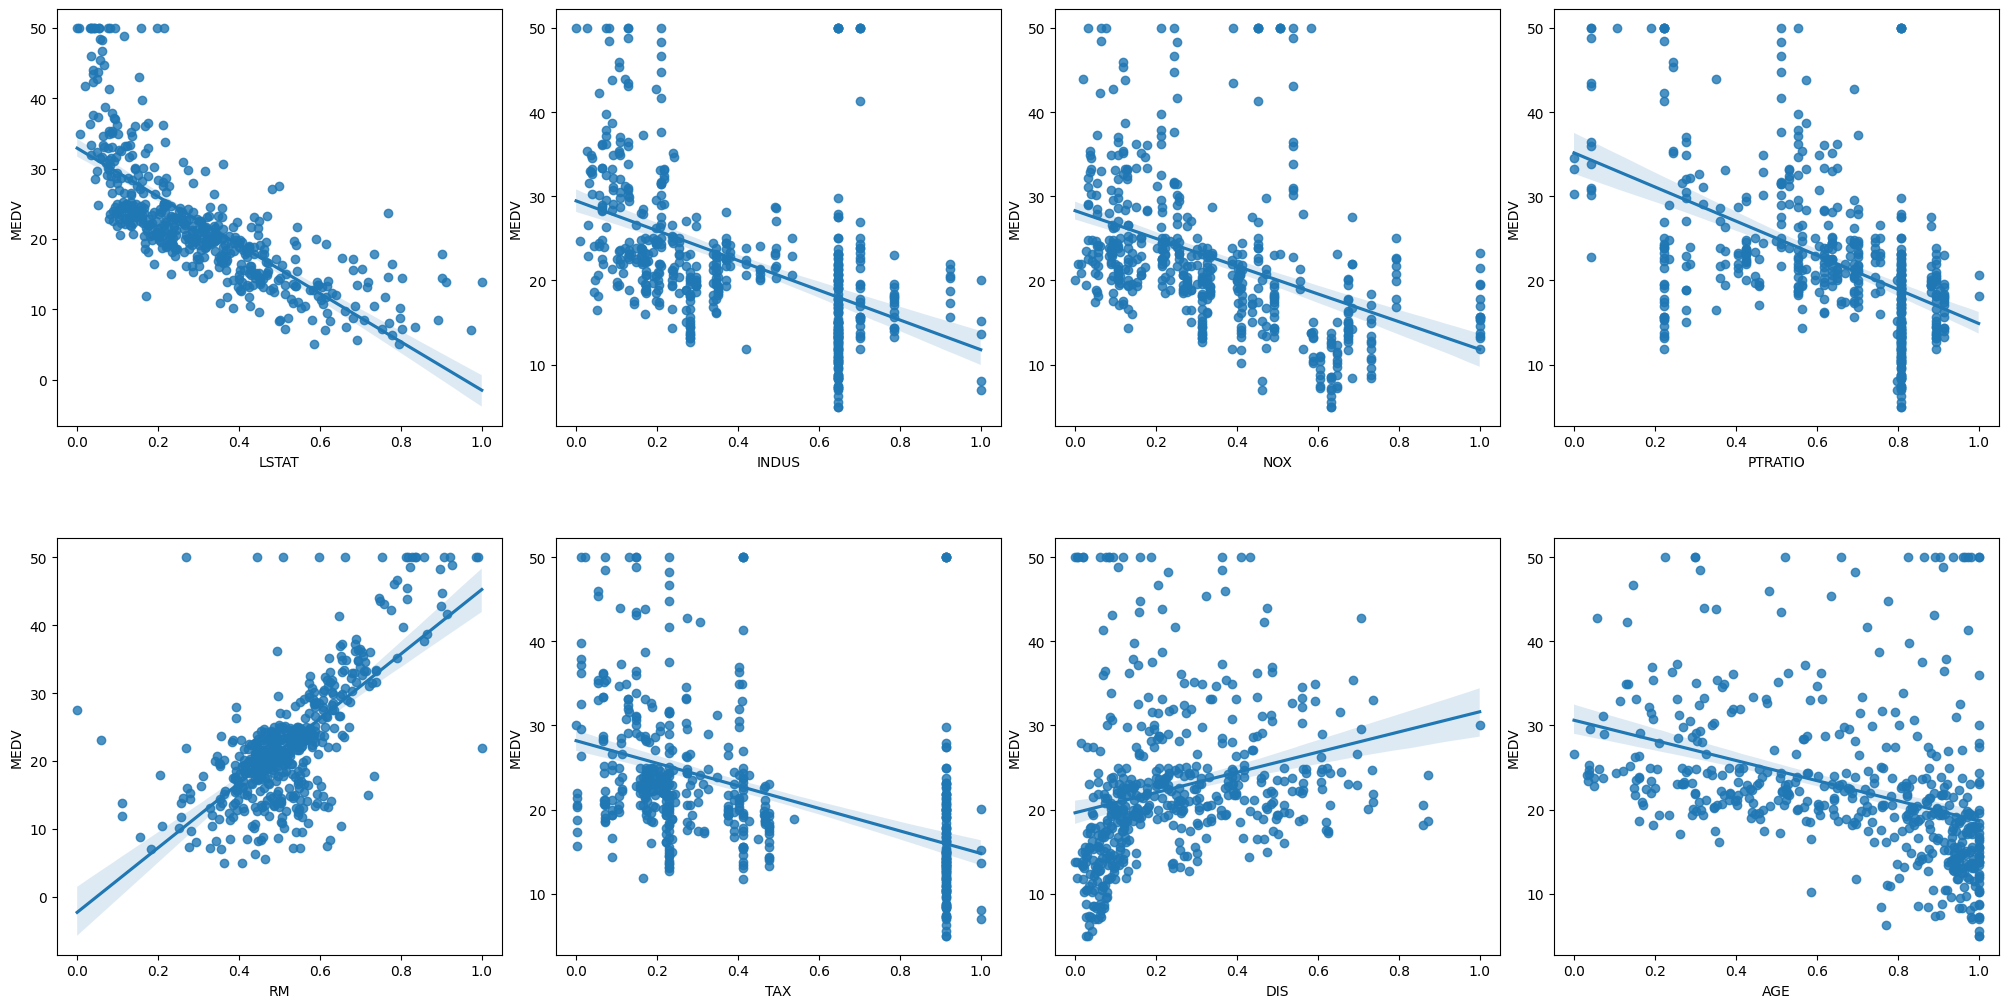

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = data.loc[:, column_sels]
# target variable
y = data['MEDV']

X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
  sns.regplot(y=y, x=X[k], ax=axs[i])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Select and build the model

#### Train the model

#### Make predictions

#### Evaluate the results

#### What is the problem here?

#### What to do when the result is worst?
- Tune the model?
- To go with another one?

#### Questions:
- Which model is the best one?
- Is the best model is of an acceptable quality?
- Can you use accuracy to assess the quality of these models?

#### Using the same data to solve a classification problem!
- How can I translate a regression problem into a classification problem?

#### Revised Problem Definition:
- The goal is to predict the level of housing price values in such a way that
    - if MEDV <= 15, the level would be low,
    - else if MEDV > 15 and MEDV <= 25, the level would be medium
    - otherwise, the level would be high